# Tutorial 10: Estimating $\pi$ through simulation

In this tutorial, we will use a simulation approach to estimate $\pi$. To to do this, we imagine we have a circular dart board of radpinned to a square wall, and randomly throw darts at the wall. We then take note of where the darts hit the wall and whether or not they fall within our outwith the dart board (assuming the dart must hit somewhere within that square wall).




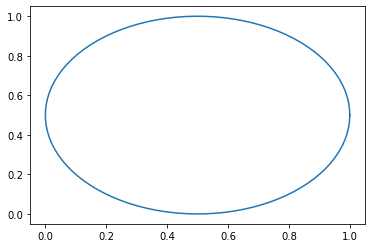

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 100) 
r = 0.5
# Plot circle using equation of circle
plt.figure()
plt.plot(r*np.cos(theta) + 0.5, r*np.sin(theta) + 0.5)
plt.show()

<font size="4">

## Part 1
Construct a function `darts(n)` that will simulate the dart throwing experiment and return a $n \times 2$ numpy array of both the sample of points and whether they are inside the circle (1) or outside the circle (0).

Now for $n\in [50,100,1000,10000]$, simulate $n$ points within the unit square and determine whether or not these fall inside the circle.

Determine how mathematically you could use the proportion of points that fall inside the circle to estimate $\pi$. Using these simulated points, calculate an estimate of $\pi$ for each $n$ and store these in a dictionary with the keys being the size of $n$ and the values the estimate of $\pi$.  

<p style='text-align:right;'> <b> [4 Marks] </b> </p>


In [2]:
# define darts function

def darts(n):
    points = np.random.rand(n, 2)  # generate a random set of n coordinates with x,y values between 0,1
    
    dart_pos = []
    for point in points:
        
        centered_point = point - np.array([0.5, 0.5])  # since circle is centered on (0.5,0,5)
        
        distance = np.sqrt(centered_point[0]**2 + centered_point[1]**2)  # distance from center of circle to 'dart'
        
        if distance <= 0.5:        # if less than or equal to radius 
            dart_pos.append(1)    # set position to 1 to represent inside the circle
        else:
            dart_pos.append(0)   # if not set 0 to represent not

    
    outcome = np.column_stack((points, dart_pos))  # stack the coordinates and the position together in to desired array

    return outcome

# area of circle = pi/4
# area of square = 1
# we can say that the number of darts inside the circle is proportional to its area

# pi/4 = number inside circle / total darts thrown 
# => pi = 4 *  number inside circle / total darts thrown   (1)


n_values = [50, 100, 1000, 10000]

pi_values = {}  # empty dictionary

for n in n_values:
    outcome = darts(n)
    proportion_inside = len(outcome[outcome[:,2]==1]) / n  # number of darts inside / total darts thrown
    pi = 4 * proportion_inside    # (1)
    pi_values[n] = pi     # assign n in the dictionary to the value of pi it estimated
    
print(pi_values)
    



{50: 3.12, 100: 3.12, 1000: 3.244, 10000: 3.1408}


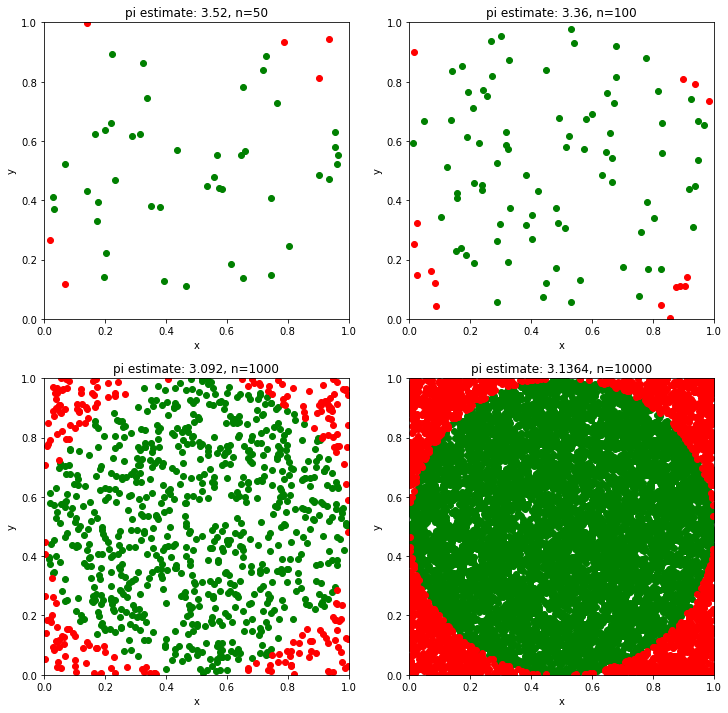

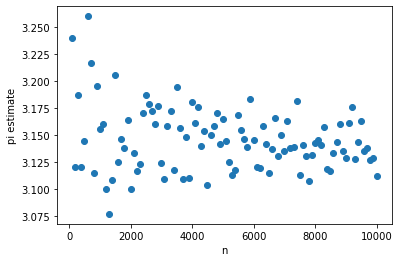

In [3]:
# Generate subplots grid 

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

n_values = [50, 100, 1000, 10000] 

for i, n in enumerate(n_values):
    outcome = darts(n)
    inside = outcome[outcome[:,2] == 1]    # points that fell inside the unit circle
    outside = outcome[outcome[:,2] == 0]   # points that fell outside the unit circle
    
    axs[i].scatter(inside[:,0], inside[:,1], color='green')    # plot the "inside" points in green
    axs[i].scatter(outside[:,0], outside[:,1], color='red')    # plot the "outside" points in red
    axs[i].set_title(f'pi estimate: {4 * (len(outcome[outcome[:,2]==1]) / n)}, n={n}')    # add a title with the pi estimate and n value
    axs[i].set_xlim([0, 1])    # set the x-axis limits to the unit square
    axs[i].set_ylim([0, 1])    # set the y-axis limits to the unit square
    axs[i].set_xlabel('x')     # add a label for the x-axis
    axs[i].set_ylabel('y')     # add a label for the y-axis

plt.show()

#========================================================================
# Generate scatterplot of pi estimates against the number of darts thrown
#========================================================================

new_n_values = np.arange(100, 10100, 100)

pi_estimates = []

for n in new_n_values:
    outcome = darts(n)
    proportion_inside = len(outcome[outcome[:,2]==1]) / n    # calculate the proportion of darts that fell inside the unit circle
    pi = 4 * proportion_inside    # calculate the estimated value of pi
    pi_estimates.append(pi)

plt.scatter(new_n_values, pi_estimates)    # plot the estimated values of pi against the number of darts thrown
plt.xlabel('n')    
plt.ylabel('pi estimate')    
plt.show()